Решить задачу Коши методом Адамса со значениями шага 0.1 и 0.01.  
y' = (y*(2*y*log(x)-1)-1)/x,  y(1) = 1/3,  1 <= x <= 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def Runge_Kutta(arr_x, h):
    arr_y = np.zeros(len(arr_x))
    arr_y[0] = 0.3333333
    for i in range(1, len(arr_x)):
        k1 = f(arr_x[i-1], arr_y[i-1])
        k2 = f(arr_x[i-1] + h/2, arr_y[i-1] + k1 * h / 2)
        k3 = f(arr_x[i-1] + h/2, arr_y[i-1] + k2 * h / 2)
        k4 = f(arr_x[i-1] + h, arr_y[i-1] + k3 * h)
        arr_y[i] = arr_y[i-1] + h*(k1 + 2*k2 + 2*k3 + k4)/6
    return arr_y

def Euler(arr_x, h):
    arr_y = np.zeros(len(arr_x))
    arr_y[0] = 0.3333333
    for i in range(1, len(arr_x)):
        arr_y[i] = arr_y[i-1] + h * f(arr_x[i-1], arr_y[i-1])
    return arr_y

def Adams(xx, yy, f, h):
    ans_yy = np.zeros(xx.shape)
    ans_yy[0:4] += yy
    for k in range(4, xx.shape[0]):
        f_k = f(xx[k-1], ans_yy[k-1])
        f_k_1 = f(xx[k-2], ans_yy[k-2])
        f_k_2 = f(xx[k-3], ans_yy[k-3])
        f_k_3 = f(xx[k-4], ans_yy[k-4])
        ans_yy[k] = (ans_yy[k-1] + h/24*(55*f_k - 59*f_k_1 + 37*f_k_2 - 9*f_k_3))
    return ans_yy


f = lambda x, y: (y*(2*y*np.log(x)-1)-1)/x

h1, h2 = 0.1, 0.01
x_arr1 = np.arange(1, 2+h1, h1)
x_arr2 = np.arange(1, 2+h2, h2)



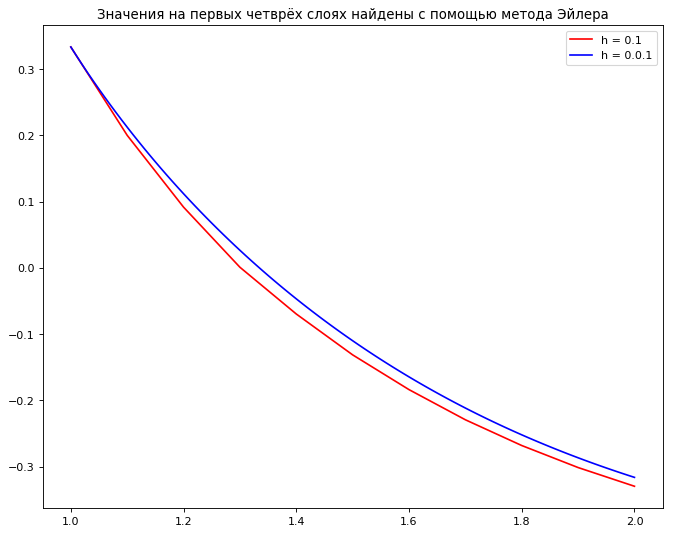

In [7]:
yy1 = Euler(xx1[:4], h1)
yy2 = Euler(xx2[:4], h2)
y_arr1 = Adams(x_arr1, yy1, f, h1)
y_arr2 = Adams(x_arr2, yy2, f, h2)

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr1, y_arr1, 'r', x_arr2, y_arr2, 'b')
plt.title("Значения на первых четврёх слоях найдены с помощью метода Эйлера")
plt.legend(("h = 0.1", "h = 0.0.1"))


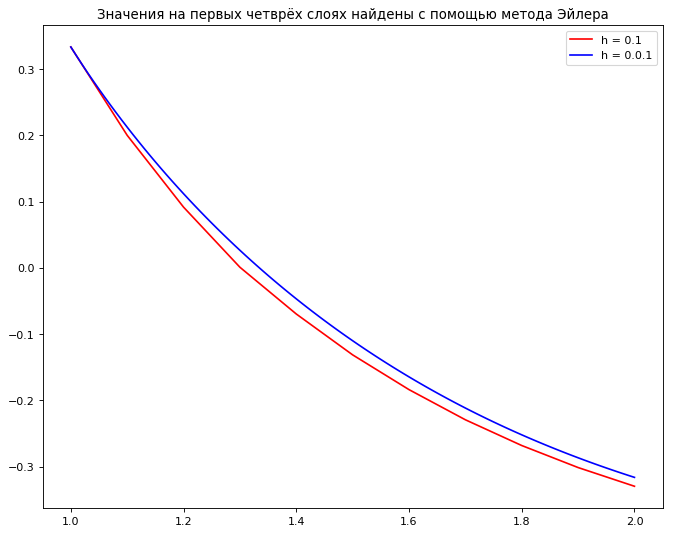

In [10]:
yy3 = Runge_Kutta(xx1[:4], h1)
yy4 = Runge_Kutta(xx2[:4], h2)
y_arr3 = Adams(x_arr1, yy1, f, h1)
y_arr4 = Adams(x_arr2, yy2, f, h2)

plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr1, y_arr3, 'r', x_arr2, y_arr4, 'b')
plt.title("Значения на первых четврёх слоях найдены с помощью метода Эйлера")
plt.legend(("h = 0.1", "h = 0.0.1"))


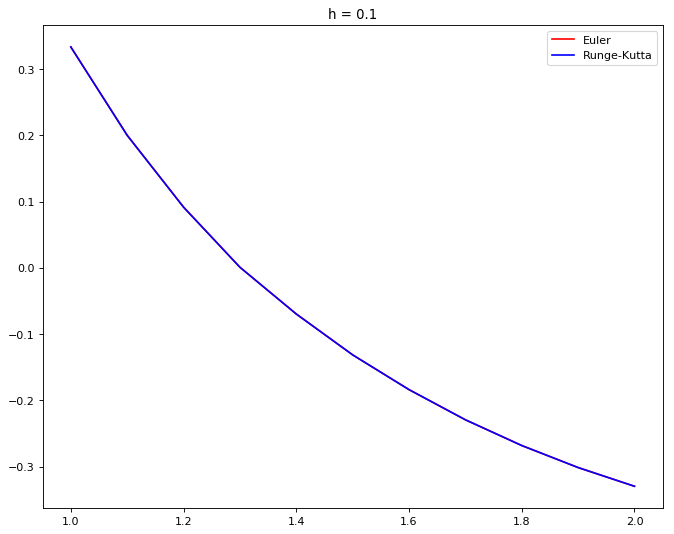

In [11]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr1, y_arr1, 'r', x_arr1, y_arr3, 'b')
plt.title("h = 0.1")
plt.legend(("Euler", "Runge-Kutta"))

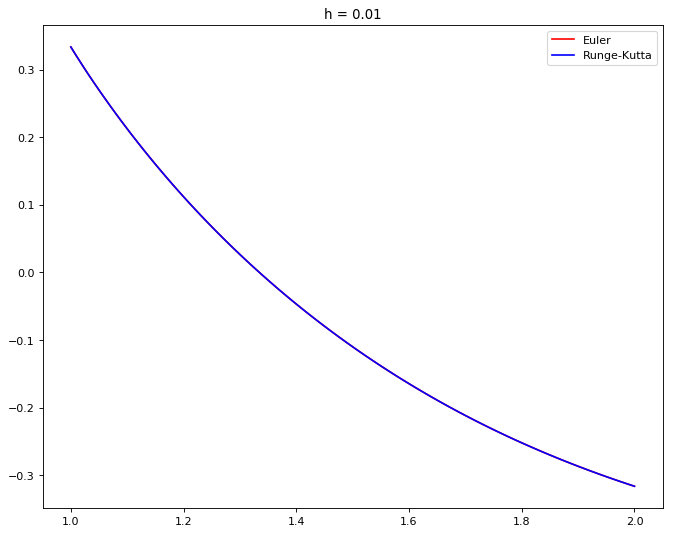

In [12]:
plt.figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_arr2, y_arr2, 'r', x_arr2, y_arr4, 'b')
plt.title("h = 0.01")
plt.legend(("Euler", "Runge-Kutta"))